## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

Missing Values: 1
Data Quality Index (DQI): 98.00%


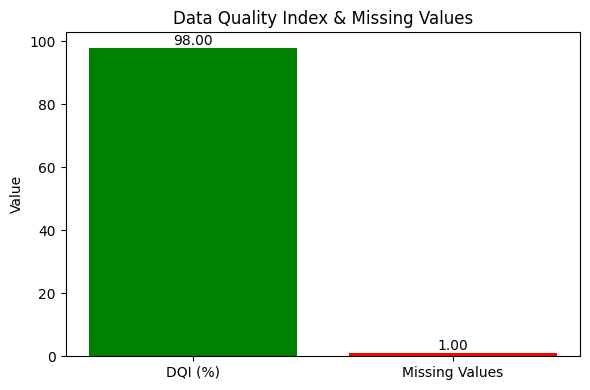

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def read_csv_file(file_path):
    """Reads a CSV file and returns a DataFrame."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            raise ValueError("The CSV file is empty.")
        return df
    except Exception as e:
        raise ValueError(f"Error reading CSV file: {e}")

def calculate_dqi(df):
    """Calculates missing values and DQI."""
    total_values = df.size
    if total_values == 0:
        raise ZeroDivisionError("Total number of data points is zero.")
    missing_values = df.isnull().sum().sum()
    dqi = (1 - (missing_values / total_values)) * 100
    return missing_values, dqi

def plot_dqi_and_errors(dqi, missing_values):
    """Plots a bar chart of DQI and missing value count."""
    labels = ['DQI (%)', 'Missing Values']
    values = [dqi, missing_values]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values, color=['green', 'red'])
    plt.title('Data Quality Index & Missing Values')
    plt.ylabel('Value')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}', ha='center')

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    file_path = '/workspaces/AI_DATA_ANALYSIS_/src/Module 8/Data Quality Scoring & Reporting/students.csv'
    try:
        df = read_csv_file(file_path)
        missing_values, dqi = calculate_dqi(df)
        print(f"Missing Values: {missing_values}")
        print(f"Data Quality Index (DQI): {dqi:.2f}%")
        plot_dqi_and_errors(dqi, missing_values)
    except Exception as e:
        print(f"Error: {e}")


### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.